In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from pandas import Series, DataFrame
%config ZMQInteractiveShell.ast_node_interactivity='all' 
%matplotlib inline

In [2]:
# 数据来源：https://s3.amazonaws.com/tripdata/index.html
# 偷懒只处理最近6个月数据
bike_df = pd.read_csv('data/citibike/JC-201704-citibike-tripdata.csv')
bike_df = bike_df.append(pd.read_csv('data/citibike/JC-201705-citibike-tripdata.csv'), ignore_index=False)
bike_df = bike_df.append(pd.read_csv('data/citibike/JC-201706-citibike-tripdata.csv'), ignore_index=False)
bike_df = bike_df.append(pd.read_csv('data/citibike/JC-201707-citibike-tripdata.csv'), ignore_index=False)
bike_df = bike_df.append(pd.read_csv('data/citibike/JC-201708-citibike-tripdata.csv'), ignore_index=False)
bike_df = bike_df.append(pd.read_csv('data/citibike/JC-201709-citibike-tripdata.csv'), ignore_index=False)
print(bike_df.shape)
bike_df.head()

(181376, 15)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,252,2017-04-01 00:14:36,2017-04-01 00:18:48,3186,Grove St PATH,40.719586,-74.043117,3203,Hamilton Park,40.727596,-74.044247,26238,Subscriber,NaN,0
1,452,2017-04-01 00:15:47,2017-04-01 00:23:20,3203,Hamilton Park,40.727596,-74.044247,3213,Van Vorst Park,40.718489,-74.047727,26186,Subscriber,1962.0,1
2,465,2017-04-01 00:46:27,2017-04-01 00:54:13,3271,Danforth Light Rail,40.692640,-74.088012,3216,Columbia Park,40.697030,-74.096937,24659,Subscriber,1996.0,1
3,417,2017-04-01 00:47:15,2017-04-01 00:54:13,3271,Danforth Light Rail,40.692640,-74.088012,3216,Columbia Park,40.697030,-74.096937,24471,Subscriber,1994.0,1
4,391,2017-04-01 01:13:12,2017-04-01 01:19:44,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,24624,Subscriber,1983.0,1


In [3]:
print('租赁点：%d' % len(bike_df['start station name'].unique()))
print('被骑自行车数量：%d' % len(bike_df['bikeid'].unique()))
print('骑行次数：%d' % bike_df.shape[0])
print('每部骑行时长（分钟）：%.2f' % float(bike_df['tripduration'].sum() / bike_df['bikeid'].count() / 60))
print('租借频率：%.2f' % float(bike_df['bikeid'].count() / len(bike_df['bikeid'].unique())))

租赁点：52
被骑自行车数量：883
骑行次数：181376
每部骑行时长（分钟）：14.09
租借频率：205.41


In [4]:
# 按月统计
bike_df['starttime']=pd.to_datetime(bike_df['starttime'])
bike_df = bike_df.set_index('starttime') # 转成时间序列


In [15]:
df_bike = bike_df.copy()
bike_df_by_month = df_bike.resample("M").apply(len)
# resample 简化时间的groupby处理

bike_df_by_month = bike_df_by_month['bikeid']
bike_df_by_month


starttime
2017-04-30    21186
2017-05-31    25966
2017-06-30    32060
2017-07-31    33573
2017-08-31    35472
2017-09-30    33119
Freq: M, Name: bikeid, dtype: int64

Text(0.5,0,'月份')

Text(0,0.5,'租赁骑行次数')

Text(0.5,1,'最近半年Citi Bike每月骑行次数')

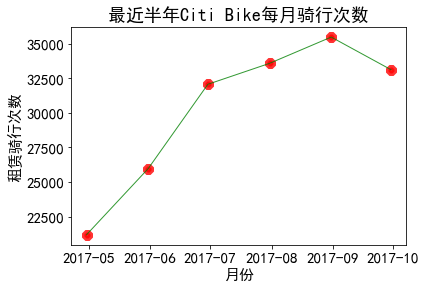

In [16]:
# 画出每月骑行次数
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号
plt.rc('font', family='SimHei', size=15)
plt.plot(bike_df_by_month, 'r8', bike_df_by_month, 'g-', linewidth=1, markeredgewidth=5, alpha=0.8)
plt.xlabel('月份')
plt.ylabel('租赁骑行次数')
plt.title('最近半年Citi Bike每月骑行次数')
plt.show()

In [17]:
# 画出按季度的分布
bike_df_by_quarter = bike_df.resample('Q').apply(len)
bike_df_by_quarter = bike_df_by_quarter['bikeid']
print(bike_df_by_quarter)

starttime
2017-06-30     79212
2017-09-30    102164
Freq: Q-DEC, Name: bikeid, dtype: int64


In [20]:
bike_df.groupby('gender')['bikeid'].agg(len) 
bike_df["bikeid"].count()

gender
0     15183
1    128186
2     38007
Name: bikeid, dtype: int64

181376

gender
0     8.371008
1    70.674180
2    20.954812
Name: bikeid, dtype: float64


([<matplotlib.patches.Wedge at 0x2d649d34cc0>,
 [Text(0.283443,1.06285,'未知'),
  Text(-0.874449,-0.667338,'男性'),
  Text(1.01787,0.41707,'女性')],
 [Text(0.154605,0.579739,'8.4%'),
  Text(-0.476972,-0.364002,'70.7%'),
  Text(0.5552,0.227493,'21.0%')])

Text(0.5,1,'Citi Bike用户性别占比')

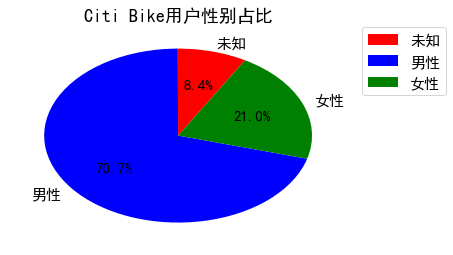

In [21]:
# 左闭右开

# 画出性别分布
bike_df_by_gender= bike_df.groupby('gender')['bikeid'].agg(len) / bike_df["bikeid"].count() * 100
print(bike_df_by_gender)
# plt.pie(bike_df_by_gender,labels=['未知', '男性', '女性'], colors=['red', 'blue', 'green'],explode=(0, 0, 0),startangle=60,autopct='%1.1f%%')
plt.pie(bike_df_by_gender,labels=['未知', '男性', '女性'], colors=['red', 'blue', 'green'], explode=(0, 0, 0), startangle=60, autopct='%1.1f%%')
plt.title('Citi Bike用户性别占比')
plt.legend(['未知', '男性', '女性'], bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0.)
plt.show()